In [175]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.cross_validation import train_test_split
import numpy

In [177]:
Tweet= pandas.read_csv("tweets.csv")
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [178]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [179]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

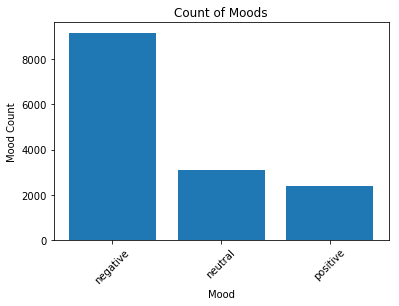

In [180]:
Mood_count=Tweet['airline_sentiment'].value_counts()
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')


In [181]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

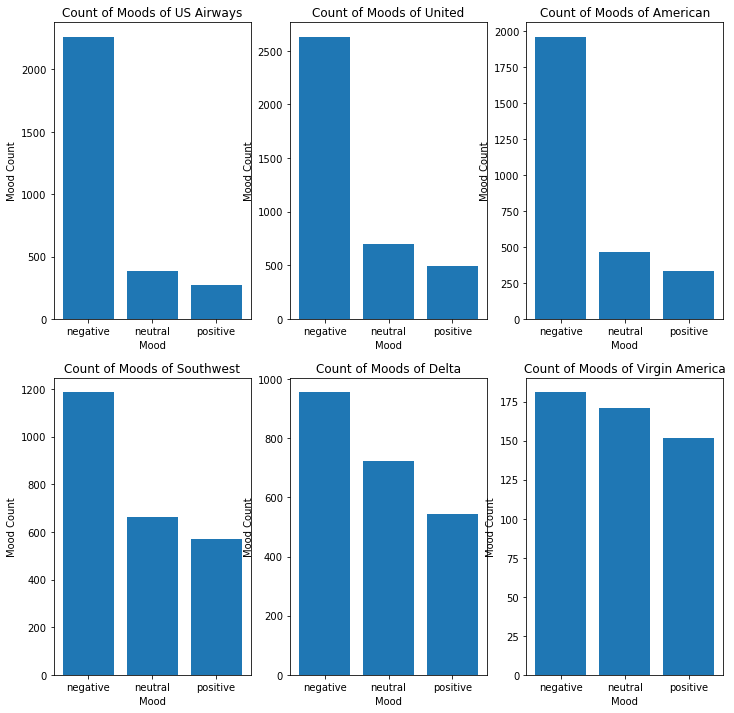

In [182]:
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

From the above plots one can find that the distribution of moods for the first three airlines are always skewed toward negative moods. On contrary, the moods are distributed more balanced with the later three airline companies.

In [207]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))

In [208]:
Tweet['negativereason'].value_counts(sort=False)

Cancelled Flight                847
Damaged Luggage                  74
Flight Booking Problems         529
Can't Tell                     1190
Late Flight                    1665
Lost Luggage                    724
Bad Flight                      580
longlines                       178
Flight Attendant Complaints     481
Customer Service Issue         2910
Name: negativereason, dtype: int64

In [209]:
def NR_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [210]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

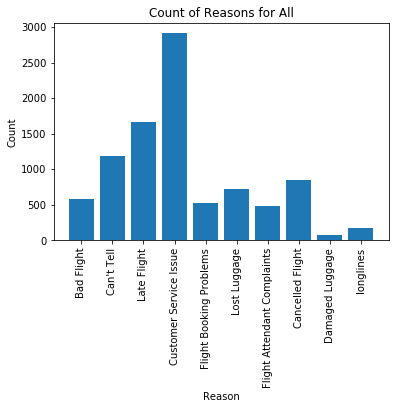

In [211]:
plot_reason('All')

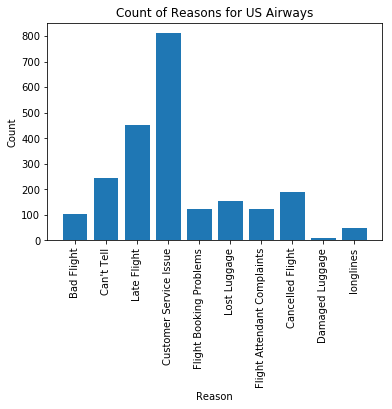

In [212]:
plot_reason('US Airways')

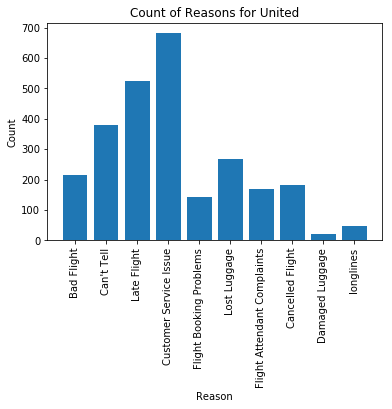

In [213]:
plot_reason('United')

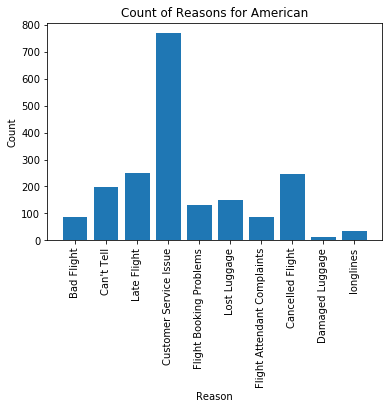

In [214]:
plot_reason('American')

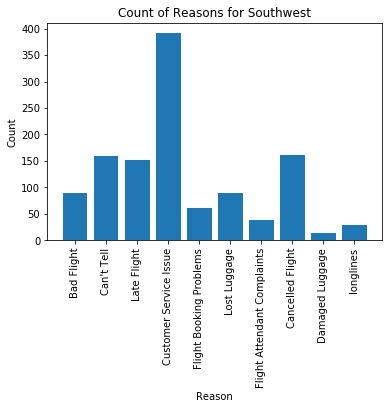

In [215]:
plot_reason('Southwest')

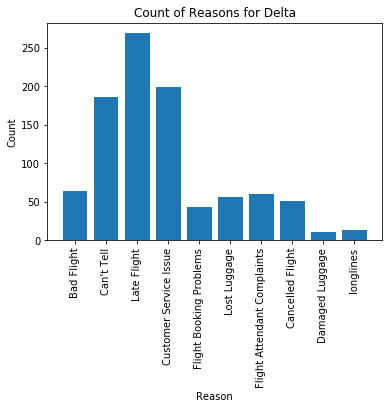

In [216]:
plot_reason('Delta')

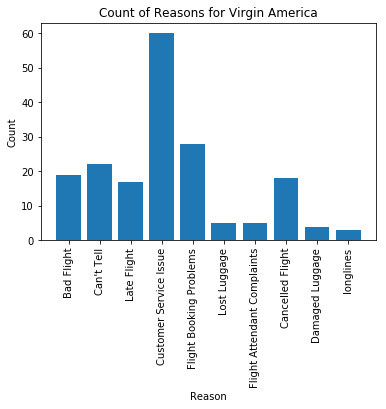

In [217]:
plot_reason('Virgin America')

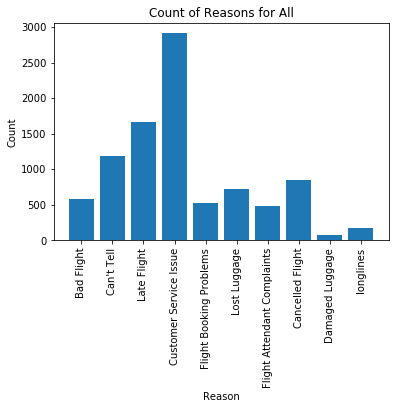

In [219]:
plot_reason('All')

D: Word Cloud for the negative Tweets

In [220]:
# pip install (conda install) wordcloud
from wordcloud import WordCloud, STOPWORDS

In [221]:
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [222]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

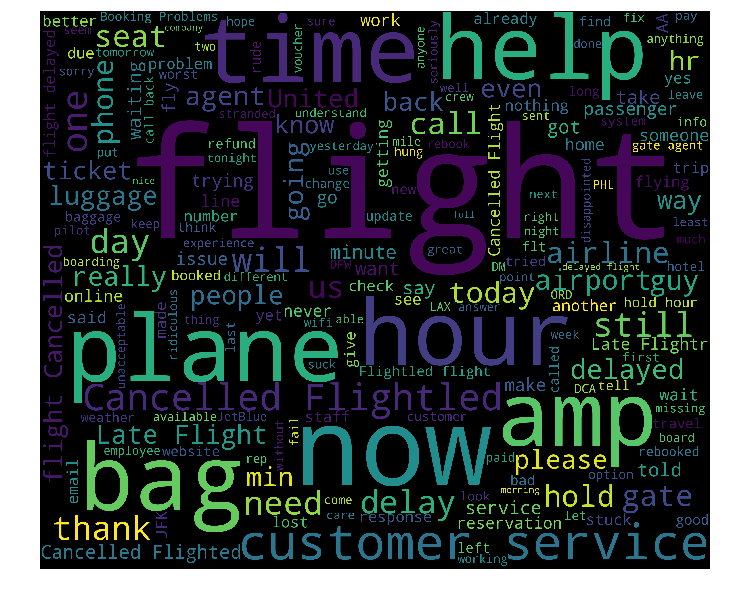

In [223]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the Tweets with negative moods are frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights.

### E: Preprocess data for classification¶

Our data exploration ends up at here. The next step will be preprocess the data in order to make the learning process more smooth.

In [224]:
import re
import nltk
from nltk.corpus import stopwords
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [225]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [226]:
Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [227]:
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)

In [228]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [230]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [232]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

In [233]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+ classifier.__class__.__name__+' is '+str(accuracy))    

Accuracy of LogisticRegression is 0.645150273224
Accuracy of KNeighborsClassifier is 0.589139344262
Accuracy of SVC is 0.813524590164
Accuracy of DecisionTreeClassifier is 0.762978142077
Accuracy of RandomForestClassifier is 0.81762295082


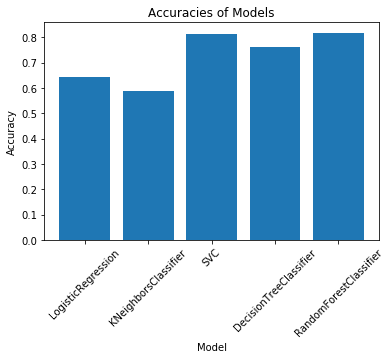

In [235]:
Index = [1,2,3,4,5]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

#### Lets take SVC and further tune it

In [236]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [237]:
import numpy as np
from sklearn.pipeline import make_pipeline, Pipeline

np.random.seed(1)
pipeline_svm = make_pipeline(v, 
                            SVC(probability=True, class_weight="balanced"))



In [238]:
from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1], 'svc__kernel':['linear','rbf','sigmoid','poly']}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(train['clean_tweet'], train['sentiment'])
grid_svm.score(test['clean_tweet'], test['sentiment'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.6min finished


0.89807283034191676

In [239]:
print (grid_svm.best_params_ , grid_svm.best_score_)
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result 

({'svc__kernel': 'linear', 'svc__C': 0.1}, 0.89636325012164442)


In [240]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

report_results(grid_svm.best_estimator_, test['clean_tweet'], test['sentiment'])

{'acc': 0.81079234972677594,
 'auc': 0.89807690641987359,
 'f1': 0.75807860262008731,
 'precision': 0.69384492406075138,
 'recall': 0.83541867179980756}

In [241]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

In [242]:
roc_svm = get_roc_curve(grid_svm.best_estimator_, test['clean_tweet'], test['sentiment'])

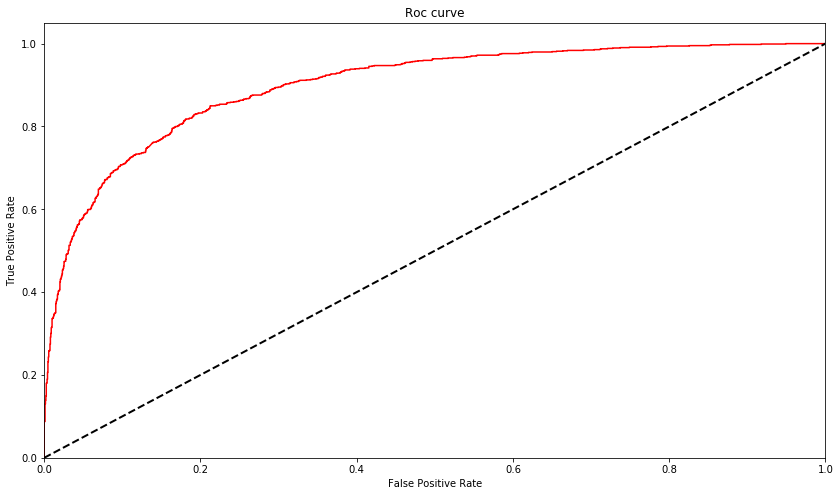

In [243]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

In [244]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, train['clean_tweet'], train['sentiment'], cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

In [245]:
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

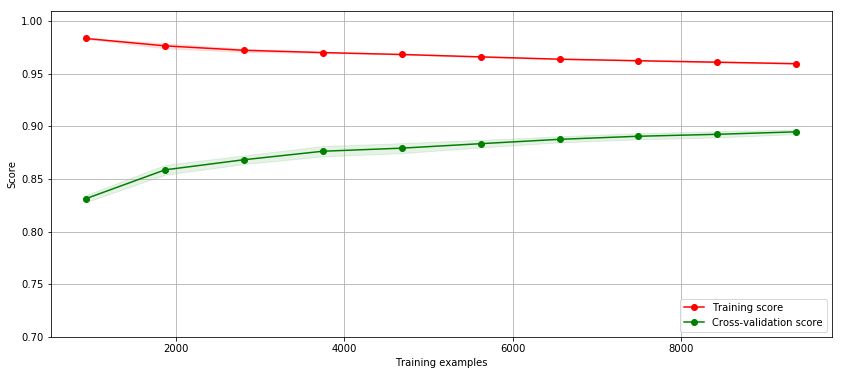

In [246]:
plot_learning_curve(train['clean_tweet'], train['sentiment'], train_sizes, 
                    train_scores, test_scores, ylim=(0.7, 1.01), figsize=(14,6))
plt.show()

In [247]:
def predict(twt):
    '''
    function to do sentiment analysis
    '''
    return_val = 'negative' if grid_svm.predict([twt])[0] == 0 else 'non negative'
    return return_val

In [248]:
predict("flying with @united is always a bad experience")

'negative'